In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

import sklearn.datasets as datasets
x, y = datasets.make_classification(n_samples = 1000, n_features=10, n_redundant=2, n_informative=2,random_state=10, n_clusters_per_class=2)

 3.2.Опредлелить размер данных, их тип, полноту, получить основные статистики, постороить гистограммы и оценить нормальность признаков и целей

In [2]:
x.shape, y.shape

((1000, 10), (1000,))

In [3]:
pd.DataFrame(x).sample(5)

,0,1,2,3,4,5,6,7,8,9
540,-0.285995,0.612037,-0.649967,0.371768,-1.180804,-0.270255,0.672703,0.902974,-1.288086,-0.076791
771,0.854787,0.405895,0.865957,0.138992,1.253368,-0.807835,1.351802,-1.420845,0.010867,1.021285
92,0.633116,-1.145506,0.015669,0.064590,-1.061457,1.171527,0.898075,-1.091591,-1.624142,0.386141
334,-0.158723,0.055809,2.406967,0.762223,1.713225,-1.547807,1.868488,1.069413,-0.521878,-0.648495
861,0.529070,-0.082410,-0.728945,0.124837,1.084228,0.738625,0.941075,-0.839760,-2.170003,0.612592


In [4]:
pd.DataFrame(x).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
 5   5       1000 non-null   float64
 6   6       1000 non-null   float64
 7   7       1000 non-null   float64
 8   8       1000 non-null   float64
 9   9       1000 non-null   float64
dtypes: float64(10)
memory usage: 78.2 KB


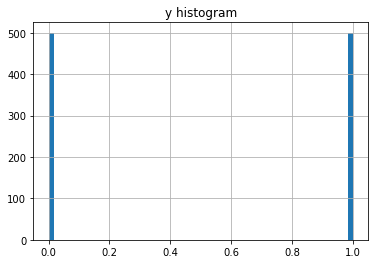

In [5]:
plt.hist(y, bins=60)
plt.grid()
plt.title('y histogram')
plt.show()

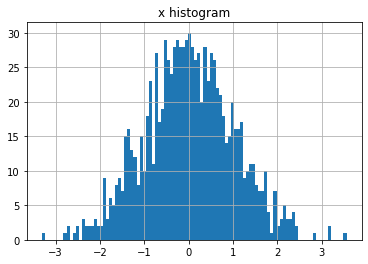

In [6]:
#1.4
a = x[:,4]
plt.hist(x[:,5], bins=100)
plt.grid()
plt.title('x histogram')
plt.show()

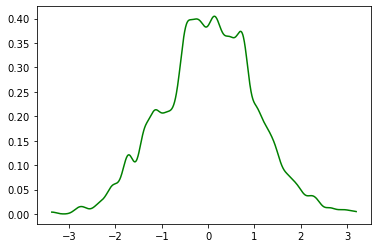

In [7]:
from scipy.stats import gaussian_kde
from numpy import linspace

cur_density = gaussian_kde(x[:, 1], bw_method=0.1)
dens_x = linspace(min(x[:, 1]), max(x[:, 1]), 1000)
plt.plot(dens_x, cur_density(dens_x), 'g')
plt.show()

RangeIndex(start=0, stop=10, step=1)


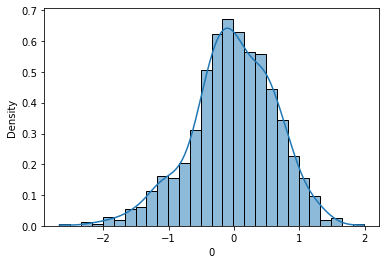

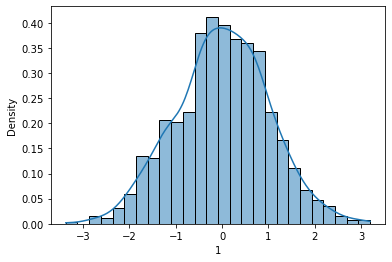

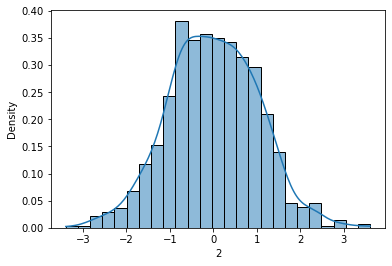

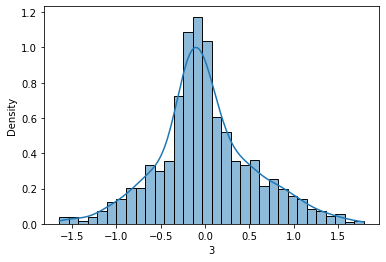

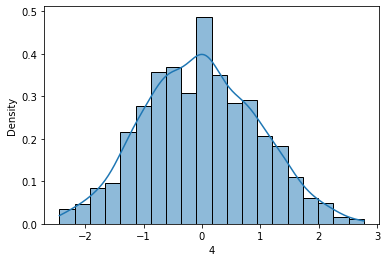

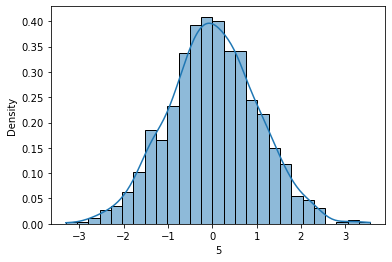

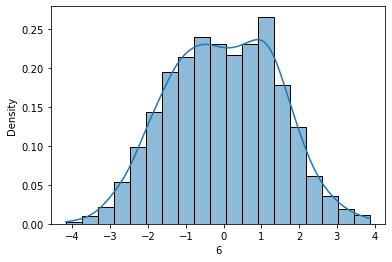

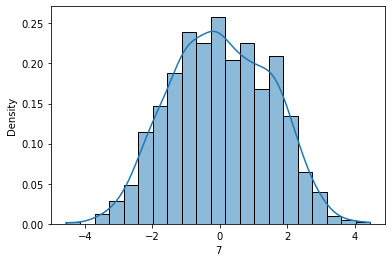

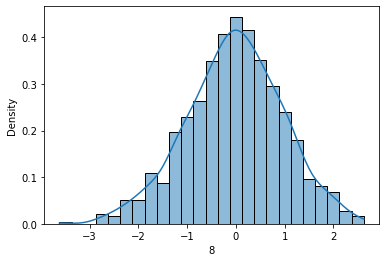

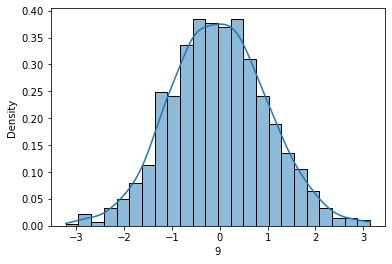

-0.157567    1
-0.576625    1
 0.590507    1
 0.417469    1
 0.892010    1
            ..
 0.184855    1
 0.569297    1
-0.150794    1
-0.471843    1
 0.501490    1
Name: 3, Length: 1000, dtype: int64

In [8]:
import seaborn as sns
df = pd.DataFrame(x)
print(df.columns)
for i in df.columns:
    sns.histplot(df[i], kde=True, stat='density')
    plt.show()

df[3].value_counts()

<AxesSubplot:xlabel='3'>

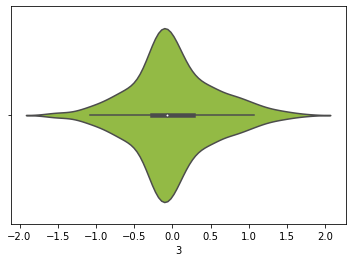

In [9]:
sns.violinplot(x=3, data= df, color='yellowgreen')

In [10]:
# 1.6
stat, p = stats.shapiro(y)
print(p)
# stat, p = stats.shapiro(df[5])
# p
# if p < 0.05 not normal
for i in df.columns:
    stat, p = stats.shapiro(df[i])
    print(p)

1.375654702427673e-41
2.3967645574884955e-06
0.7110874652862549
0.5703008770942688
7.481153474486746e-10
0.03685912489891052
0.9886271953582764
0.000765552802477032
0.0002946888271253556
0.12480808049440384
0.8562895655632019


In [11]:
# 1.7.

pd.DataFrame(y).describe()

,0
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [12]:
pd.DataFrame(x).describe(include='all')

,0,1,2,3,4,5,6,7,8,9
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.013492,0.004214,0.002821,0.003494,-0.022243,0.014314,-0.006039,0.028241,-0.025667,-0.024700
std,0.645372,1.005216,1.029026,0.547215,0.962656,1.005281,1.424215,1.456110,0.981600,1.010847
min,-2.670446,-3.372347,-3.393109,-1.641748,-2.441323,-3.303552,-4.177161,-4.566371,-3.621639,-3.214030
25%,-0.392961,-0.610443,-0.712012,-0.268376,-0.697636,-0.643992,-1.085367,-1.051192,-0.654636,-0.690303
50%,0.001190,0.033826,-0.004586,-0.063412,-0.023704,0.000127,0.005688,-0.005679,-0.007113,-0.046884
75%,0.446587,0.683323,0.723599,0.275331,0.670831,0.674512,1.103614,1.166891,0.629907,0.638625
max,1.987890,3.193371,3.609161,1.792885,2.772083,3.561219,3.883022,4.456363,2.625106,3.142285


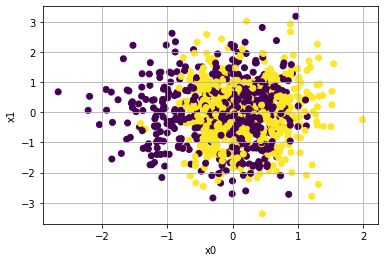

In [13]:
plt.scatter(x[:,0],x[:,1],c = y)
plt.grid()
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [15]:
np.bincount(y)

array([500, 500])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=17)

In [17]:
knn = KNeighborsClassifier(n_neighbors=7)

In [18]:
%%time
knn.fit(X_train, y_train)

CPU times: user 3.85 ms, sys: 1.37 ms, total: 5.22 ms
Wall time: 2.29 ms


KNeighborsClassifier(n_neighbors=7)

In [19]:
knn_pred = knn.predict(X_test)
accuracy_score(y_test, knn_pred)

0.9066666666666666

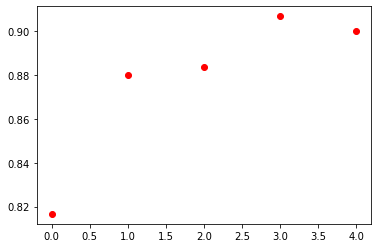

In [20]:
accs = []
# models = []
for n_neighbors in [1, 3, 5, 7, 100]:
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
#     models.append(model)
    knn_pred = model.predict(X_test)
    accs.append(accuracy_score(y_test, knn_pred))

plt.plot(accs, 'ro')

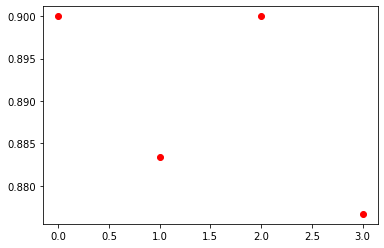

In [21]:
accs = []
for metric in ["minkowski", "manhattan", "euclidean", "chebyshev"]:
    model = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
    model.fit(X_train, y_train)
    knn_pred = model.predict(X_test)
    accs.append(accuracy_score(y_test, knn_pred))

plt.plot(accs, 'ro')

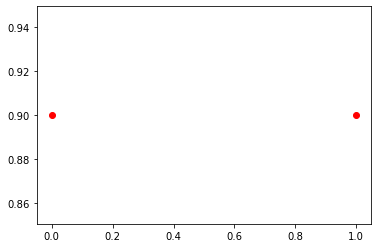

In [22]:
accs = []
for weight in ["uniform", "distance"]:
    model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weight)
    model.fit(X_train, y_train)
    knn_pred = model.predict(X_test)
    accs.append(accuracy_score(y_test, knn_pred))

plt.plot(accs, 'ro')

In [23]:
from sklearn.model_selection import GridSearchCV


In [24]:
clf = KNeighborsClassifier()

parameters = {
            'n_neighbors': [1, 3, 5, 7, 10],
            'metric': ["minkowski", "manhattan", "euclidean", "chebyshev"],
            'weights': ["uniform", "distance"]
        }
clf = GridSearchCV(clf, parameters, cv=5, n_jobs=-1)

clf = clf.fit(X_train, y_train)
knn_pred = clf.predict(X_test)
print(accuracy_score(y_test, knn_pred))

for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, clf.best_params_[param_name]))

0.8933333333333333
metric: 'manhattan'
n_neighbors: 7
weights: 'uniform'


Вывод
Датасет был сгенерирован с помощью встроенное функции для создания данных для классификации. Датасет имеет размер 1000, с 10 параметрами.
В данном датасете классификация бинарная. Некоторые параметры пытаються иметь нормальное распределение, другие нет. В данных присутствует небольшой разброс.
С помощью данных графиков, удобно сделать выводы о характеристике данных, стоит ли с ними проводить дополнительные манипуляции, прежде чем перейти в обучению на них.
Метод ближайших соседей, оказался довольно быстро обучаемым и легко интерпретируемым. Но метод ресурсоемкий, легко переобучаем  и не всегда эффективен. В данном датасете с помощью функции гридсерч, удалось выяснить что лучшая метрика оказалась Манхэтен, количество соседей равно 7, а взвешивание униформ.